In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

sns.set_context('talk')

In [11]:
cv_f1_logres = [0.81891, 0.69032, 0.69029]
cv_acc_logres = [0.73284, 0.67691, 0.67689]
test_f1_logres = [0.71758, 0.75565, 0.75566]
test_acc_logres = [0.80527, 0.68324, 0.68326]

cv_f1_lgbm = [0.86043, 0.8554, 0.85539]
cv_acc_lgbm = [0.79647, 0.84829, 0.84814]
test_f1_lgbm = [0.83055,0.83252,0.83402]
test_acc_lgbm = [0.76030, 0.76318, 0.76237]

cv_f1_catboost = [0.88894, 0.88617, 0.88491]
cv_acc_catboost = [0.84089, 0.88279, 0.88143]
test_f1_catboost = [0.85001, 0.84620, 0.84883]
test_acc_catboost = [0.79025, 0.78146, 0.78657]

cv_f1_rf = [0.91565, 0.92, 0.92020, 0.9213]
cv_acc_rf = [0.87991, 0.91862, 0.91885, 0.91986]
test_f1_rf = [0.87343, 0.87463, 0.87415, 0.87581]
test_acc_rf = [0.82325, 0.82396, 0.82347, 0.82506]

In [12]:
df_metric = pd.DataFrame(
    data={
        "algorithm": ["logistic regression"] * 3 + ["lightgbm"] * 3 + ["catboost"] * 3 + ["random forest"] * 4,
        "iteration": [1,2,3] * 3 + [1,2,3,4],
        "cv_f1": cv_f1_logres + cv_f1_lgbm + cv_f1_catboost + cv_f1_rf,
        "cv_accuracy": cv_acc_logres + cv_acc_lgbm + cv_acc_catboost + cv_acc_rf,
        "test_f1": test_f1_logres + test_f1_lgbm + test_f1_catboost + test_f1_rf,
        "test_accuracy": test_acc_logres + test_acc_lgbm + test_acc_catboost + test_acc_rf,
    }
)

In [13]:
df_metric

,algorithm,iteration,cv_f1,cv_accuracy,test_f1,test_accuracy
0,logistic regression,1,0.81891,0.73284,0.71758,0.80527
1,logistic regression,2,0.69032,0.67691,0.75565,0.68324
2,logistic regression,3,0.69029,0.67689,0.75566,0.68326
3,lightgbm,1,0.86043,0.79647,0.83055,0.76030
4,lightgbm,2,0.85540,0.84829,0.83252,0.76318
5,lightgbm,3,0.85539,0.84814,0.83402,0.76237
6,catboost,1,0.88894,0.84089,0.85001,0.79025
7,catboost,2,0.88617,0.88279,0.84620,0.78146
8,catboost,3,0.88491,0.88143,0.84883,0.78657
9,random forest,1,0.91565,0.87991,0.87343,0.82325


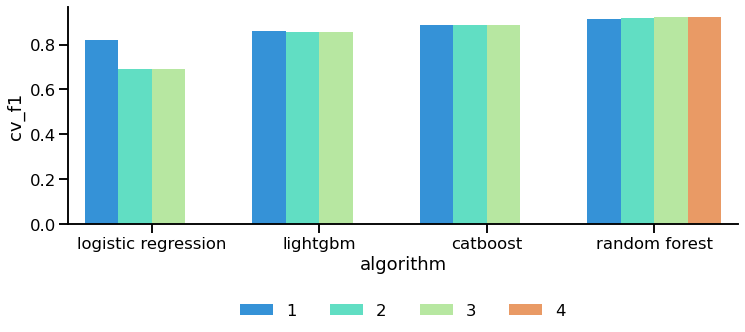

In [26]:
f, ax = plt.subplots(figsize=(12,4))
sns.barplot(
    data=df_metric,
    x='algorithm',
    y='cv_f1',
    palette='rainbow',
    hue='iteration',
    ax=ax
)

plt.legend(loc='lower center', bbox_to_anchor=[.5,-.5], ncol=4, frameon=False)
sns.despine();

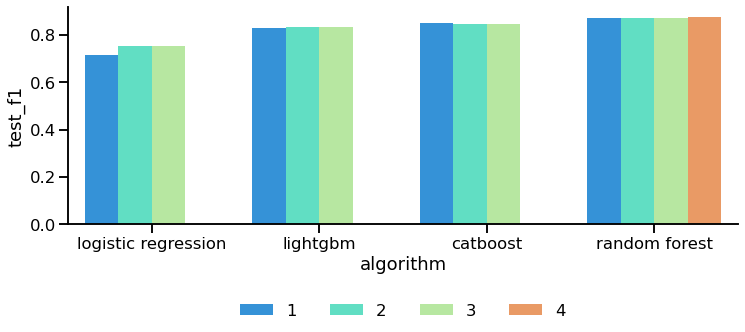

In [28]:
f, ax = plt.subplots(figsize=(12,4))
sns.barplot(
    data=df_metric,
    x='algorithm',
    y='test_f1',
    palette='rainbow',
    hue='iteration',
    ax=ax
)

plt.legend(loc='lower center', bbox_to_anchor=[.5,-.5], ncol=4, frameon=False)
sns.despine();

In [29]:
df_metric_rf = df_metric.query("algorithm == 'random forest'")
df_metric_rf

,algorithm,iteration,cv_f1,cv_accuracy,test_f1,test_accuracy
9,random forest,1,0.91565,0.87991,0.87343,0.82325
10,random forest,2,0.92000,0.91862,0.87463,0.82396
11,random forest,3,0.92020,0.91885,0.87415,0.82347
12,random forest,4,0.92130,0.91986,0.87581,0.82506
